In [1]:
import sys
sys.path.insert(0,'../')
from utils import get_ex_results, move_legend
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_theme(style="whitegrid")

In [2]:
from get_data import get_train_test_data
from tools import add_time
from train import SignatureOrderSelection, SignatureRegression, select_hatm_cv, select_nbasis_cv, BasisRegression
from plot_tensor_heatmap import plot_tensor_heatmap

In [3]:
pal = sns.color_palette("colorblind")

# Estimator convergence

In [6]:
npoints = 100
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth_independent', ntrain=10, nval=10,  Y_type='sig', npoints=npoints, d=2, scale_X=False)

Xtimetrain = add_time(Xtrain)
Xtimeval = add_time(Xval)


8


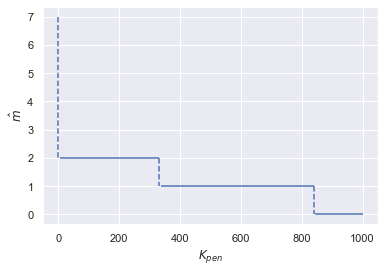

Enter slope heuristic constant Kpen:  10


Hatm 2


In [7]:
order_sel = SignatureOrderSelection(Xtimetrain.shape[2])
print(order_sel.max_k)
hatm = order_sel.get_hatm(Xtimetrain, Ytrain, Kpen_values=np.linspace(10 ** (-10), 10 ** (3), num=200), plot=False, savefig=False)

print("Hatm", hatm)

In [8]:
df = get_ex_results('results/estimator_convergence')
df['hatm'] = df['hatm'].astype(int)

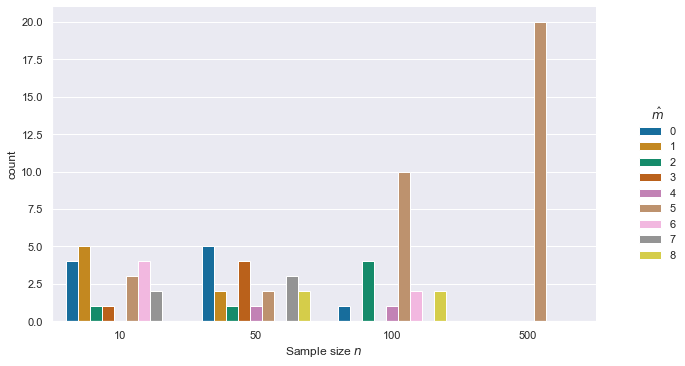

In [9]:
g = sns.catplot(x='ntrain', hue="hatm", data=df, kind="count", palette="colorblind")
g.fig.set_size_inches(10,5)
plt.xlabel(r"Sample size $n$")
g._legend.set_title(r"$\hat{m}$")
plt.savefig('Figures/convergence_hatm.png', bbox_inches='tight')
plt.show()

# Comparison of spline and signature regression when d varies

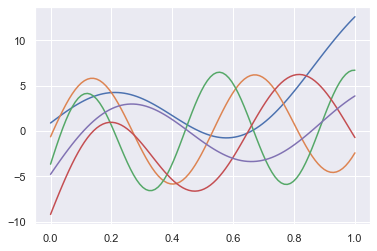

In [10]:
npoints = 100
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth_independent', ntrain=1, nval=1,  Y_type='mean', npoints=npoints, d=5, scale_X=False, seed=6)

plt.plot(np.linspace(0,1,num=npoints),Xtrain[0,:,:])
plt.savefig('Figures/samples_X_polysinus_independent.png')
plt.show()


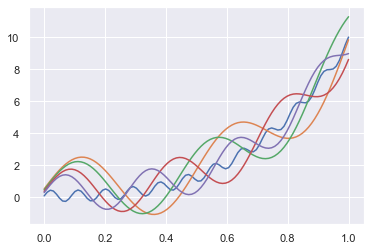

In [11]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth_dependent', ntrain=10, nval=10,  Y_type='mean', npoints=100, d=5, seed=6, scale_X=False)

plt.plot(np.linspace(0,1,num=100),Xtrain[0,:,:])
plt.savefig('Figures/samples_X_polysinus_dependent.png')
plt.show()

In [12]:
df = get_ex_results('results/dim_study')

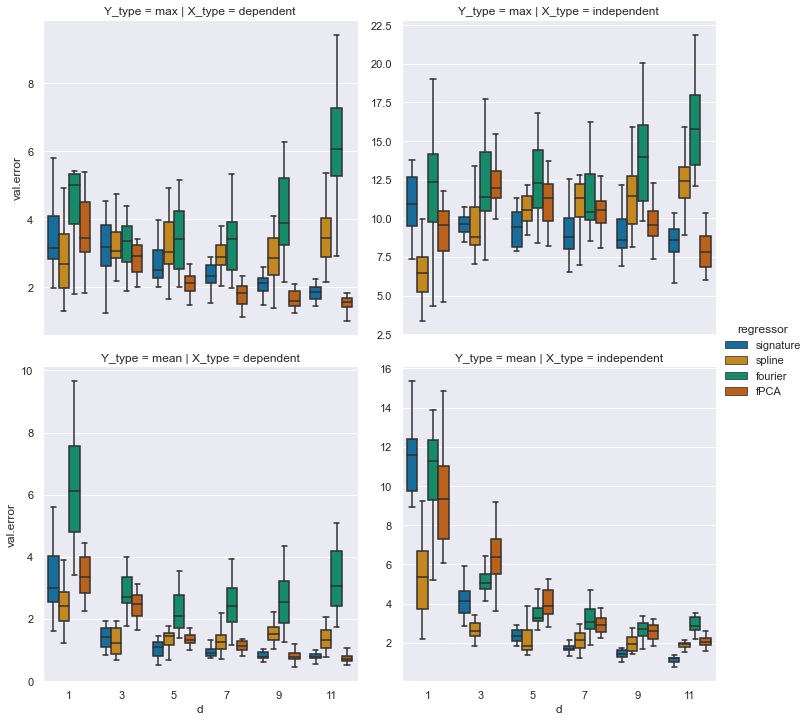

In [14]:
g = sns.catplot(x="d", y="val.error", hue="regressor", col ='X_type', row='Y_type',data=df, kind='box', 
                 sharey=False, palette="colorblind", showfliers=False)
plt.show()

In [15]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'spline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})

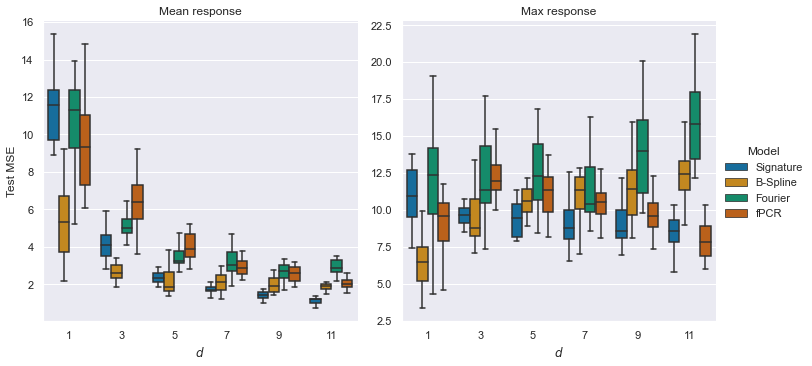

In [16]:
g = sns.catplot(x="d", y="val.error", hue="regressor", col='Y_type',data=df[df['X_type']=='independent'], kind='box', 
                 sharey=False, palette="colorblind", showfliers=False, col_order=['mean','max'])

g.axes.flat[0].set_title("Mean response")
g.axes.flat[1].set_title("Max response")

g.set_axis_labels(r"$d$", "Test MSE")
g._legend.set_title("Model")
plt.savefig("Figures/dimension_study_independent_sinus.png", bbox_inches='tight')
plt.show()

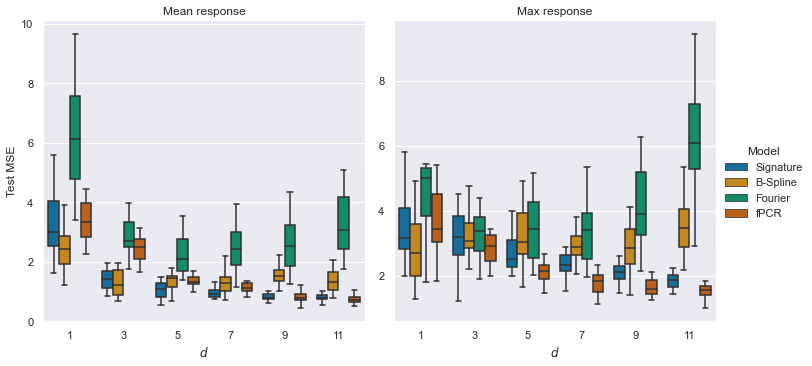

In [17]:
g = sns.catplot(x="d", y="val.error", hue="regressor", col='Y_type',data=df[df['X_type']=='dependent'], kind='box', 
                 sharey=False, palette="colorblind", showfliers=False, col_order=['mean','max'])

g.axes.flat[0].set_title("Mean response")
g.axes.flat[1].set_title("Max response")

g.set_axis_labels(r"$d$", "Test MSE")
g._legend.set_title("Model")
plt.savefig("Figures/dimension_study_dependent_sinus.png", bbox_inches='tight')
plt.show()

# Gaussian processes

In [5]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('gp',ntrain=1, nval=1, npoints=100, d=5, scale_X=False)

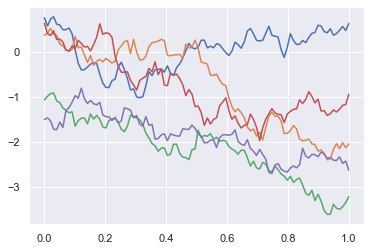

4.672225072903626


In [6]:
plt.plot(np.linspace(0, 1, num=Xtrain.shape[1]), Xtrain[0,:,:])
plt.savefig("Figures/samples_gaussian_processes.png", bbox_inches='tight')
plt.show()
print(Ytrain[0])

In [7]:
df = get_ex_results('results/dim_study_gp')
print(df.head())
print(df.shape)

  Kpen            X_type Y_type  d  hatm  nbasis nclients noise_X_std npoints  \
1  NaN  gaussian_process   None  1   4.0     NaN     None           0     100   
2  NaN  gaussian_process   None  1   NaN     4.0     None           0     100   
3  NaN  gaussian_process   None  1   NaN     4.0     None           0     100   
4  NaN  gaussian_process   None  3   2.0     NaN     None           0     100   
5  NaN  gaussian_process   None  3   NaN     4.0     None           0     100   

  nsteps ntrain nval  regressor scale_X scaling       seed selection_method  \
1   None    100  100  signature     NaN   False  306676966               cv   
2   None    100  100    bspline     NaN   False  106249698               cv   
3   None    100  100    fourier     NaN   False  906938151               cv   
4   None    100  100  signature     NaN   False  321841600               cv   
5   None    100  100    bspline     NaN   False  733013216               cv   

   training.error  val.error  
1      

In [8]:
print("Number of iterations: ",df.groupby(['d','X_type','Y_type','regressor'])['ntrain'].count()[0])

Number of iterations:  20


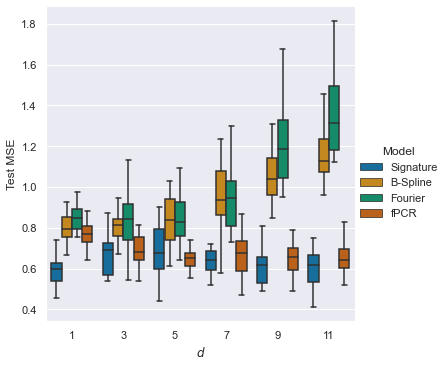

In [9]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
g = sns.catplot(x="d", y="val.error", hue="regressor", data=df, kind='box', 
                 sharey=False, palette="colorblind", showfliers=False)

g.axes.flat[0].set_title("")

g.set_axis_labels(r"$d$", "Test MSE")
g._legend.set_title("Model")
plt.savefig("Figures/dimension_study_gaussian_processes.png", bbox_inches='tight')
plt.show()

# Canadian weather dataset

## One run in details

(23, 365, 1) (12, 365, 1)


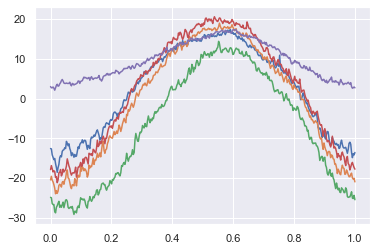

In [10]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('weather', scale_X=False)
print(Xtrain.shape, Xval.shape)
Xtimetrain = add_time(Xtrain)
Xtimeval = add_time(Xval)

plt.plot(np.linspace(0,1,num=Xtrain.shape[1]), Xtrain[:5,:,0].T)
plt.savefig('Figures/samples_canadian_weather.png')
plt.show()

### Signature regression

/Users/fermanian/Documents/Thèse/Model selection/Code/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1510: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/fermanian/Documents/Thèse/Model selection/Code/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1510: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/fermanian/Documents/Thèse/Model selection/Code/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1510: RuntimeWarning: invalid value encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2


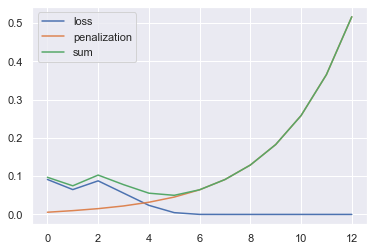

Hatm 5


In [11]:
order_sel = SignatureOrderSelection(2, Kpen=0.02)
hatm = order_sel.get_hatm(Xtimetrain, Ytrain, Kpen_values=np.linspace(10 ** (-8), 2*10 ** (-1), num=200),plot=True)

print("Hatm", hatm)

In [12]:
sig_reg = SignatureRegression(hatm)
sig_reg.fit(Xtimetrain, Ytrain)

print("val.error", sig_reg.get_loss(Xtimeval, Yval, plot=False))
print("train.error", sig_reg.get_loss(Xtimetrain, Ytrain, plot=False))

val.error 0.041552491234286
train.error 0.004620664275224839


there is a label


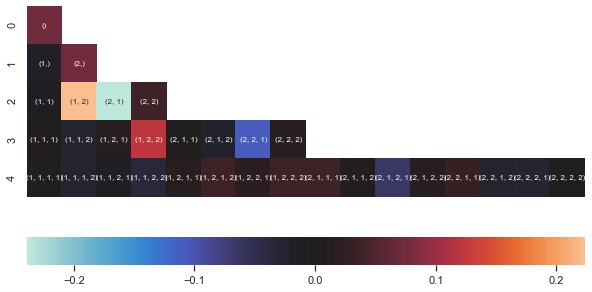

In [13]:
plot_truncation = 4
f, ax = plot_tensor_heatmap(sig_reg.reg.coef_[:2 ** (plot_truncation +1)-1], 2, plot_truncation, figsize=(10, 5), label=True, textsize=8)
plt.savefig('Figures/canadian_weather_coef_heatmap.png')
plt.show()

### Spline regression

In [14]:
basis_type = 'bspline'
nbasis = select_nbasis_cv(Xtrain, Ytrain, basis_type)
print("nbasis : ", nbasis)
spline_reg = BasisRegression(nbasis, basis_type)
spline_reg.fit(Xtrain, Ytrain)

print("val.error", spline_reg.get_loss(Xval, Yval, plot=False))
print("train.error", spline_reg.get_loss(Xtrain, Ytrain, plot=False))

nbasis :  4
val.error 0.02877255675382009
train.error 0.012812193249676506


## Results over 20 train/test splits

In [15]:
df = get_ex_results('results/weather_estimation')
print(df.head())
print(df.shape)

   Kpen   X_type Y_type     d  hatm  nbasis nclients ndays noise_X_std  \
1  0.02  weather   None  None   5.0     NaN     None  None           0   
2  0.02  weather   None  None   NaN     5.0     None  None           0   
3  0.02  weather   None  None   NaN     6.0     None  None           0   
4  0.02  weather   None  None   5.0     NaN     None  None           0   
5  0.02  weather   None  None   NaN     4.0     None  None           0   

  npoints ntrain nval  regressor scale_X scaling       seed selection_method  \
1     100    100  100  signature   False    True  629570874       estimation   
2     100    100  100    bspline   False    True  454188336       estimation   
3     100    100  100    fourier   False    True    6034263       estimation   
4     100    100  100  signature   False    True  950233983       estimation   
5     100    100  100    bspline   False    True  484998529       estimation   

   training.error  val.error  
1        0.022593   0.014889  
2        0.0

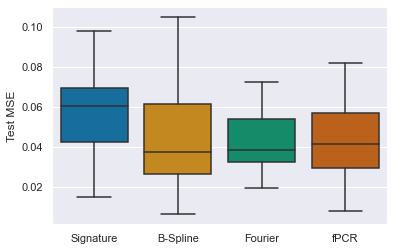

In [16]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})

g = sns.boxplot(y='val.error', x='regressor', data=df,  showfliers=False, palette="colorblind")

g.set(xlabel="", ylabel="Test MSE")

plt.savefig("Figures/canadian_weather_results.png", bbox_inches='tight')
plt.show()




# Electricity loads

(103, 168, 5) (52, 168, 5)
0.6420175549851124


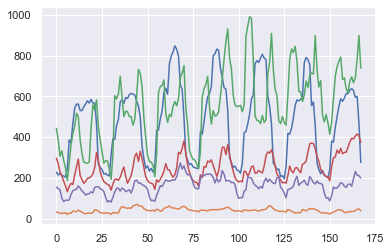

In [18]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('electricity_loads', d=5, scale_X=False)
print(Xtrain.shape, Xval.shape)

Xtimetrain = add_time(Xtrain)
Xtimeval = add_time(Xval)

print(Yval[0])
plt.plot(Xtrain[0,:,:])
plt.savefig('Figures/samples_electricity_loads.png')
plt.show()

In [19]:
df = get_ex_results('results/electricity_loads')
print(df.head())
print(df.shape)

   Kpen             X_type Y_type     d  hatm  nbasis nclients ndays  \
1  None  electricity_loads   None  None   2.0     NaN        1  None   
2  None  electricity_loads   None  None   NaN    12.0        1  None   
3  None  electricity_loads   None  None   NaN     4.0        1  None   
4  None  electricity_loads   None  None   2.0     NaN        5  None   
5  None  electricity_loads   None  None   NaN     4.0        5  None   

  noise_X_std npoints ntrain nval  regressor scale_X scaling       seed  \
1           0     100    100  100  signature   False    True  618489729   
2           0     100    100  100    bspline   False    True  630338537   
3           0     100    100  100    fourier   False    True  802119764   
4           0     100    100  100  signature   False    True   82288737   
5           0     100    100  100    bspline   False    True    9423932   

  selection_method  training.error  val.error  
1               cv        0.003903   0.005966  
2               cv  

In [20]:
print("Number of iterations: ",df.groupby(['nclients','regressor'])['ntrain'].count()[0])

Number of iterations:  20


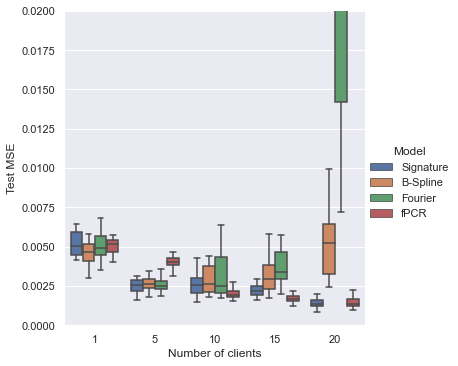

In [21]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})


g = sns.catplot(x='nclients', y='val.error', hue='regressor', data=df, kind='box', showfliers=False)

g.axes.flat[0].set_ylim(0,0.02)
g.axes.flat[0].set_title("")

g.set_axis_labels("Number of clients", "Test MSE")
g._legend.set_title("Model")
plt.savefig("Figures/dimension_study_electricity_loads.png", bbox_inches='tight')
plt.show()